In [42]:
import glob # liet ke cac path chua bu anh 
import os.path as osp
import random # su dung class imagesTranfrom de xoay anh nagu nhien 
import numpy as np
import json 
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim # chua ca thuat toan 
import torch.utils.data as data # dieu khien  ham so chua data 
import torchvision
from torchvision import models,transforms

In [43]:
torch.manual_seed(1234) 
# co dinh thi nghiem anh ko bi random khi chay lai lan nx 
np.random.seed(1234)
random.seed(1234)



In [44]:
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benmarks = False
# # co gpu thi quan trong 

In [45]:
class ImageTransform():
    # dua 1 buc anh va tien xu li 
    def __init__(self, resize, mean, std):
        self.data_transform ={
            'train' : transforms.Compose([
                #resize anh ve anh mong muon
                transforms.RandomResizedCrop(resize, scale =(0.5,1.0)),
                # ko de gi thi ben trong ngoac xac suat xoay anh la 0.5 
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean,std)
            ]),
            'val' : transforms.Compose([
                transforms.Resize(resize),
                #ko resize random resize theo dang mong muon 
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean,std)
            ])
        }
        # tao instance class thi tu goi vao call
    def __call__(self, img, phase='train'):    
        return self.data_transform[phase](img)

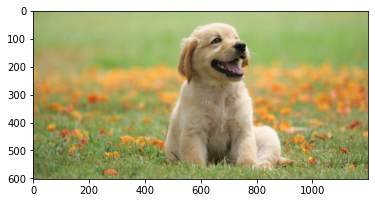

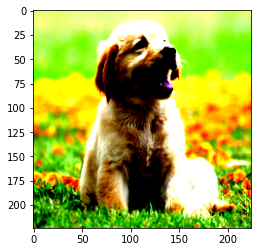

In [46]:
img_file_path ='./data/dog.jpg'
img = Image.open(img_file_path)

plt.imshow(img)
plt.show()

resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = ImageTransform(resize,mean,std)
# goi call luon
img_transformed = transform(img , phase='train')
# transpose() : doi thu tu kenh 
img_transformed = img_transformed.numpy().transpose(1,2,0)
#cat nhung gtri nam ngoai 0,1 
img_transformed = np.clip(img_transformed,0,1)
plt.imshow(img_transformed)
plt.show()

In [47]:
# liet ke cac path de chia anh 
def make_datapath_list(phase ='train'):
    # tao 1 rootpath 
    rootpath = "./data/hymenoptera_data/"
    target_path = osp.join(rootpath+phase+"/**/*.jpg")
    #tao list rong
    path_list = []
    #list chua duong link cua ong va kien 
    for path in glob.glob(target_path):
        path_list.append(path)

    return path_list
     

In [48]:
path_list = make_datapath_list("train")

In [49]:
len(path_list)

243

In [50]:
path_list[:10]

['./data/hymenoptera_data/train/ants/7759525_1363d24e88.jpg',
 './data/hymenoptera_data/train/ants/1473187633_63ccaacea6.jpg',
 './data/hymenoptera_data/train/ants/196757565_326437f5fe.jpg',
 './data/hymenoptera_data/train/ants/9715481_b3cb4114ff.jpg',
 './data/hymenoptera_data/train/ants/Nepenthes_rafflesiana_ant.jpg',
 './data/hymenoptera_data/train/ants/957233405_25c1d1187b.jpg',
 './data/hymenoptera_data/train/ants/512164029_c0a66b8498.jpg',
 './data/hymenoptera_data/train/ants/201558278_fe4caecc76.jpg',
 './data/hymenoptera_data/train/ants/6240329_72c01e663e.jpg',
 './data/hymenoptera_data/train/ants/386190770_672743c9a7.jpg']

In [51]:
train_list = make_datapath_list("train")
val_list = make_datapath_list("val")


In [52]:
# tao data set 
class MyDataSet(data.Dataset):
    def __init__(self, file_list, transform = None, phase ="train"):
        self.file_list = file_list
        self.transform = transform
        self.phase = phase

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)

        img_transformed = self.transform(img, self.phase)

        #gan nhan 
        if self.phase == "train":
            label = img_path[30:34]
        elif self.phase == "valid":
            label = img_path[28:32]

        if label == "ants":
            label = 0
        elif label == "bees":
            label = 1

        return img_transformed, label                  


In [53]:
train_dataset = MyDataSet(train_list, transform = ImageTransform(resize, mean , std), phase ="train")

In [54]:
val_dataset = MyDataSet(train_list, transform = ImageTransform(resize, mean , std), phase ="val")

In [55]:
index =0 
# print(train_dataset.__len__())
img ,label =  train_dataset.__getitem__(index)
print(img.shape)
print(label)

torch.Size([3, 224, 224])
0


In [66]:
# lay tung nhom anh (bacth_size )
 # data loader 
batch_size = 4 
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle = True)

val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size, shuffle = False)

dataloader_dict = {
    "train" :  train_dataloader,
    "val" : val_dataloader
    }


In [67]:
batch_iterator = iter(dataloader_dict["train"])
# tra ra cac gtri anh transform , label 
inputs, labels = next(batch_iterator)

In [68]:
print(inputs.shape)
print(labels)

torch.Size([4, 3, 224, 224])
tensor([1, 1, 1, 0])
